<a href="https://colab.research.google.com/github/Jonatala/Cervical/blob/main/Practice_Surprise_Hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install surprise

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 10.9 MB 25.0 MB/s 
     |████████████████████████████████| 596 kB 50.2 MB/s 
     |████████████████████████████████| 102 kB 14.0 MB/s 
     |████████████████████████████████| 690 kB 56.3 MB/s 
     |████████████████████████████████| 4.7 MB 57.9 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 812 kB 6.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=6370a6cc3b36663e99107a82aaf2059cd55fe178680976a55a819261bd8b0b47
  Stored in directory: /tmp/pip-ephem-wheel-cache-poa_9v0z/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=7b215c3fb5483defbebb8756be5ad5c2f9df137f063d8d2141b22eb1d5b7cec7
  Stored in directory: /ro

In [6]:
import surprise
import numpy as np 
import pandas as pd
from surprise import accuracy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os


In [7]:
!unzip /content/drive/MyDrive/goodbooks-10k.zip

Archive:  /content/drive/MyDrive/goodbooks-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


In [8]:
books = pd.read_csv('books.csv')

book_tags = pd.read_csv('tags.csv')

ratings = pd.read_csv('ratings.csv')

tags_data = pd.read_csv('book_tags.csv')

In [ ]:
ratings.shape

(981756, 3)

In [14]:
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np

# replace blank cells with NaN
books.replace('', np.nan, inplace=True)

# not taking book_id into the profiler report
profile = pandas_profiling.ProfileReport(books[['average_rating', 'book_id', 'books_count', 'original_publication_year', 'ratings_count']])

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [15]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [18]:
# replace blank cells with NaN
ratings.replace('', np.nan, inplace=True)

# not taking book_id into the profiler report
profile = pandas_profiling.ProfileReport(ratings[['book_id', 'user_id', 'rating']])

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

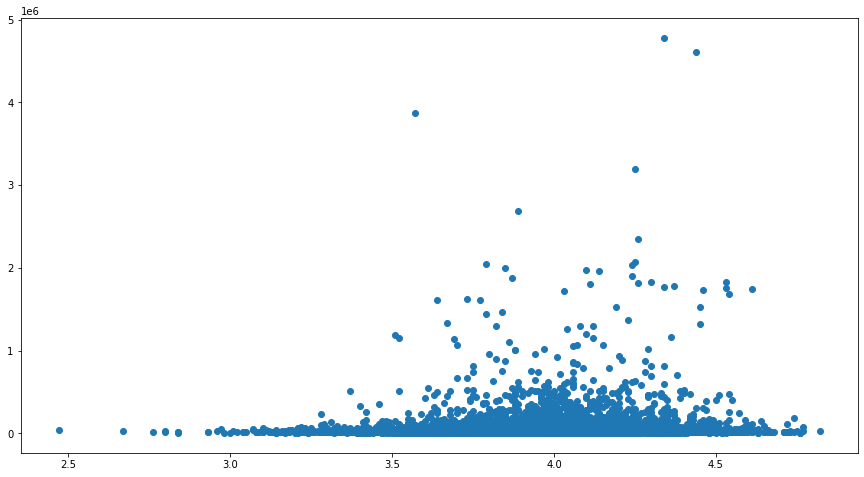

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=books['average_rating'], y=books['ratings_count'])

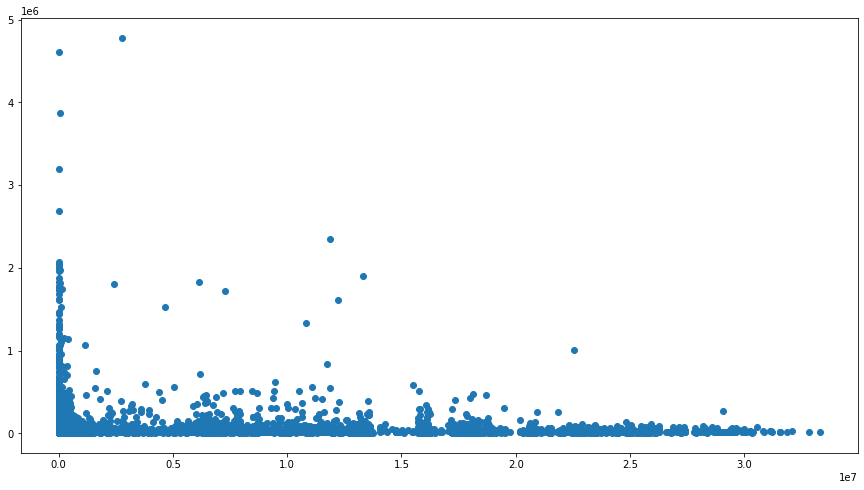

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=books['book_id'], y=books['ratings_count'])

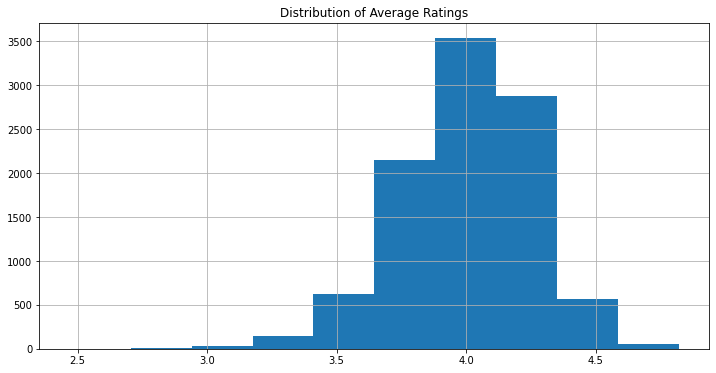

In [ ]:
#distribution of average ratings of all the 10000 books
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Distribution of Average Ratings")
books["average_rating"].hist()
display()

In [ ]:
ratings.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True)

In [ ]:
ratings.shape

(977269, 3)

In [ ]:
raw=pd.read_csv('/content/ratings.csv')

In [ ]:
print('we have',raw.shape[0], 'ratings')
print('the number of unique users we have is:', len(raw.user_id.unique()))
print('the number of unique books we have is:', len(raw.book_id.unique()))
print("The median user rated %d books."%raw.user_id.value_counts().median())
print('The max rating is: %d'%raw.rating.max(),"the min rating is: %d"%raw.rating.min())
raw.head()

we have 981756 ratings
the number of unique users we have is: 53424
the number of unique books we have is: 10000
The median user rated 8 books.
The max rating is: 5 the min rating is: 1


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
raw=raw[['user_id','book_id','rating']] 
raw.columns = ['n_users','n_items','rating']


rawTrain,rawholdout = train_test_split(raw, test_size=0.25 )

In [ ]:
reader = surprise.Reader(rating_scale=(1,5))

In [ ]:
data = surprise.Dataset.load_from_df(rawTrain,reader)
holdout = surprise.Dataset.load_from_df(rawholdout,reader)

In [ ]:
kSplit = surprise.model_selection.split.KFold(n_splits=12, shuffle=True) # split data into folds. 

In [ ]:
rmseKNN = []
rmseSVD = []
rmseCoClustering = []
rmseSlope = []
rmseHybrid = []

In [ ]:
sim_options = sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
collabKNN = surprise.KNNBasic(k=40,sim_options=sim_options) #try removing sim_options. You'll find memory errors. 

for trainset, testset in kSplit.split(data): #iterate through the folds.
    collabKNN.fit(trainset)
    predictionsKNN = collabKNN.test(testset)
    rmseKNN.append(surprise.accuracy.rmse(predictionsKNN,verbose=True))#get root means squared error

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8981
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8944
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8968
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8968
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8944
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8962
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9005
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8972
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8972
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9013
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8972
Computing the cosine 

Second Algorithm

In [ ]:
SVD = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors=30,n_epochs=10,biased=True)
min_error = 1
for trainset, testset in kSplit.split(data): #iterate through the folds.
    SVD.fit(trainset)
    predictionsSVD = SVD.test(testset)
    rmseSVD.append(surprise.accuracy.rmse(predictionsSVD,verbose=True))#get root means squared error

RMSE: 0.8535
RMSE: 0.8487
RMSE: 0.8561
RMSE: 0.8499
RMSE: 0.8561
RMSE: 0.8493
RMSE: 0.8464
RMSE: 0.8523
RMSE: 0.8530
RMSE: 0.8509
RMSE: 0.8492
RMSE: 0.8489


Third Algorithm

In [ ]:
CoClustering = surprise.prediction_algorithms.co_clustering.CoClustering(n_cltr_u=4,n_cltr_i=4,n_epochs=25) 
for trainset, testset in kSplit.split(data): #iterate through the folds.
    CoClustering.fit(trainset)
    predictionsCoClustering = CoClustering.test(testset)
    rmseCoClustering.append(surprise.accuracy.rmse(predictionsCoClustering,verbose=True))#get root means squared error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 0.8764
RMSE: 0.8818
RMSE: 0.8896
RMSE: 0.8879
RMSE: 0.8888
RMSE: 0.8852
RMSE: 0.8780
RMSE: 0.8830
RMSE: 0.8865
RMSE: 0.8872
RMSE: 0.8835
RMSE: 0.8853


Fourth Algorithm

In [ ]:
slopeOne = surprise.prediction_algorithms.slope_one.SlopeOne()
for trainset, testset in kSplit.split(data): #iterate through the folds.
    slopeOne.fit(trainset)
    predictionsSlope = slopeOne.test(testset)
    rmseSlope.append(surprise.accuracy.rmse(predictionsSlope,verbose=True))#get root means squared error



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 0.9283
RMSE: 0.9243
RMSE: 0.9258
RMSE: 0.9227
RMSE: 0.9217
RMSE: 0.9194
RMSE: 0.9206
RMSE: 0.9245
RMSE: 0.9224
RMSE: 0.9288
RMSE: 0.9206
RMSE: 0.9235


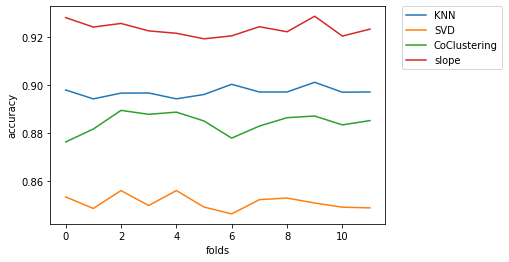

In [ ]:
#plotting the prediction data:
import matplotlib.pyplot as plt
modelPrediction = plt.plot(rmseKNN,label='KNN')
modelPrediction = plt.plot(rmseSVD,label='SVD')
modelPrediction = plt.plot(rmseCoClustering,label='CoClustering')
modelPrediction = plt.plot(rmseSlope,label='slope')
modelPrediction = plt.xlabel('folds')
modelPrediction = plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)



class HybridAlgorithm(surprise.AlgoBase):

   
    def __init__(self, epochs, learning_rate, num_models):  #
        self.alpha = np.array([1/len(str(num_models))]*len(str(num_models)))
        self.epochs = epochs
        self.learning_rate = learning_rate
    
    def fit(self,holdout):

        holdout=holdout.build_full_trainset().build_testset()
               
        for epoch in range(self.epochs):
       
            predictions = ([collabKNN.test(holdout),SVD.test(holdout),CoClustering.test(holdout),slopeOne.test(holdout)])

            #maeGradient = [surprise.accuracy.mae(prediction) for prediction in predictions]
            rmseHybrid = [surprise.accuracy.rmse(prediction) for prediction in predictions]
           
            #newalpha = self.alpha - learning_rate * maeGradient  
            #convergence check:
            if newalpha - self.alpha < 0.001:
               break
            self.alpha = newalpha

              
    def estimate(self,u,i):
       
         if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            raise PredictionImpossible('User and/or item is unkown.')
           
         algoResults = np.array([collabKNN.predict(u,i),SVD.predict(u,i),CoClustering.predict(u,i),slopeOne.predict(u,i)])

         return np.sum(np.dot(self.alpha,algoResults))



In [ ]:
hybrid = HybridAlgorithm(epochs=10, learning_rate=0.05, num_models=4) #

hybrid.fit(holdout)
rmseHyb = []
for trainset, testset in kSplit.split(data): #iterate through the folds.
    predhybrid = hybrid.test(testset)
    rmseHyb.append(surprise.accuracy.rmse(predhybrid, verbose=True))


RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234
RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234
RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234
RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234
RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234
RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234
RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234
RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234
RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234
RMSE: 0.8962
RMSE: 0.8497
RMSE: 0.8836
RMSE: 0.9234


AttributeError: ignored

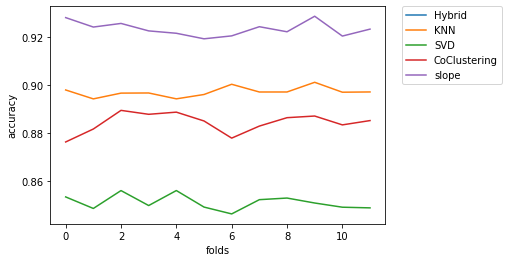

In [ ]:
import matplotlib.pyplot as plt
modelPrediction = plt.plot(rmseHybrid,label='Hybrid')
modelPrediction = plt.plot(rmseKNN,label='KNN')
modelPrediction = plt.plot(rmseSVD,label='SVD')
modelPrediction = plt.plot(rmseCoClustering,label='CoClustering')
modelPrediction = plt.plot(rmseSlope,label='slope')
modelPrediction = plt.xlabel('folds')
modelPrediction = plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)